In [11]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('City Network.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,42.4,Amsterdam,Utrecht
1,29.7,Leiden,schiphol
2,20.5,Den Haag,Leiden
3,22.8,Woerden,Gouda
4,27.8,Utrecht,Woerden
5,24.0,Woerden,Alphen aan de rijn
6,10.9,Den Haag,Delft
7,27.4,Zaanstad,Amsterdam
8,23.3,Zaanstad,Haarlem
9,20.2,Haarlem,Schiphol


In [13]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [14]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zaanstad', 'Haarlem', 'Schiphol', 'Almere', 'Hilversum', 'Zoetermeer', 'Amersfoort', 'Rotterdam', 'Vlaardingen', 'Spijkenisse', 'Dordrecht', 'zoetermeer', 'Rotterdam ']


In [15]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Utrecht', 'Dordrecht', 'Rotterdam', 'Delft']


In [16]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

4


In [17]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

84.0


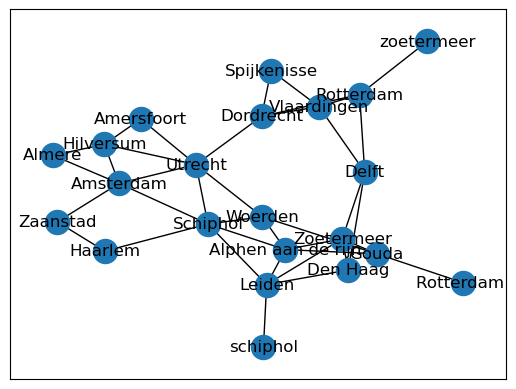

In [18]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

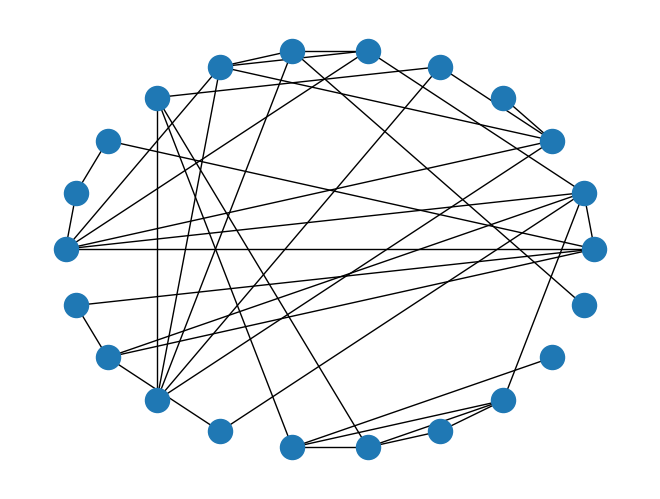

In [19]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph)

In [20]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 30.705952380952386,
 'Utrecht': 71.78809523809524,
 'Leiden': 34.852380952380955,
 'schiphol': 0.0,
 'Den Haag': 5.926190476190476,
 'Woerden': 18.53333333333333,
 'Gouda': 21.916666666666664,
 'Alphen aan de rijn': 13.726190476190478,
 'Delft': 27.666666666666664,
 'Zaanstad': 1.3333333333333333,
 'Haarlem': 4.508333333333334,
 'Schiphol': 56.961904761904755,
 'Almere': 0.0,
 'Hilversum': 6.119047619047619,
 'Zoetermeer': 26.51904761904762,
 'Amersfoort': 0.0,
 'Rotterdam': 23.610714285714288,
 'Vlaardingen': 10.277380952380952,
 'Spijkenisse': 0.0,
 'Dordrecht': 43.554761904761904,
 'zoetermeer': 0.0,
 'Rotterdam ': 0.0}

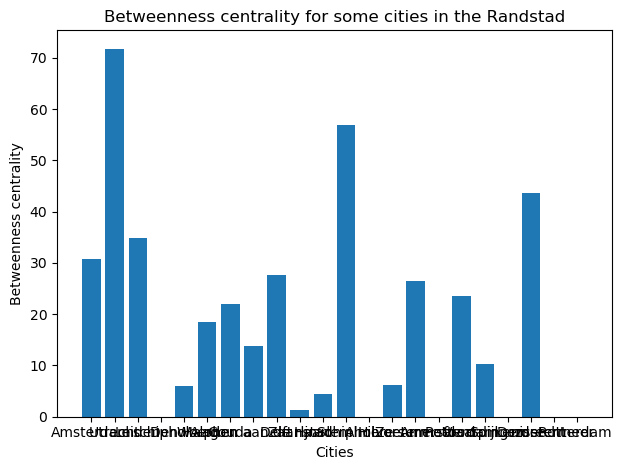

In [21]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.tight_layout()

In [22]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.017316017316017316,
 ('Amsterdam', 'Zaanstad'): 0.025974025974025976,
 ('Amsterdam', 'Schiphol'): 0.1471861471861472,
 ('Amsterdam', 'Almere'): 0.06926406926406926,
 ('Amsterdam', 'Hilversum'): 0.03896103896103896,
 ('Utrecht', 'Woerden'): 0.11255411255411256,
 ('Utrecht', 'Schiphol'): 0.017316017316017316,
 ('Utrecht', 'Hilversum'): 0.06493506493506493,
 ('Utrecht', 'Amersfoort'): 0.0735930735930736,
 ('Utrecht', 'Dordrecht'): 0.08225108225108226,
 ('Leiden', 'schiphol'): 0.09090909090909091,
 ('Leiden', 'Den Haag'): 0.20346320346320346,
 ('Leiden', 'Schiphol'): 0.21645021645021645,
 ('Leiden', 'Alphen aan de rijn'): 0.03463203463203463,
 ('Leiden', 'Zoetermeer'): 0.047619047619047616,
 ('Den Haag', 'Delft'): 0.19480519480519481,
 ('Den Haag', 'Zoetermeer'): 0.030303030303030304,
 ('Woerden', 'Gouda'): 0.09956709956709957,
 ('Woerden', 'Alphen aan de rijn'): 0.04329004329004329,
 ('Woerden', 'Schiphol'): 0.017316017316017316,
 ('Gouda', 'Alphen aan de rijn

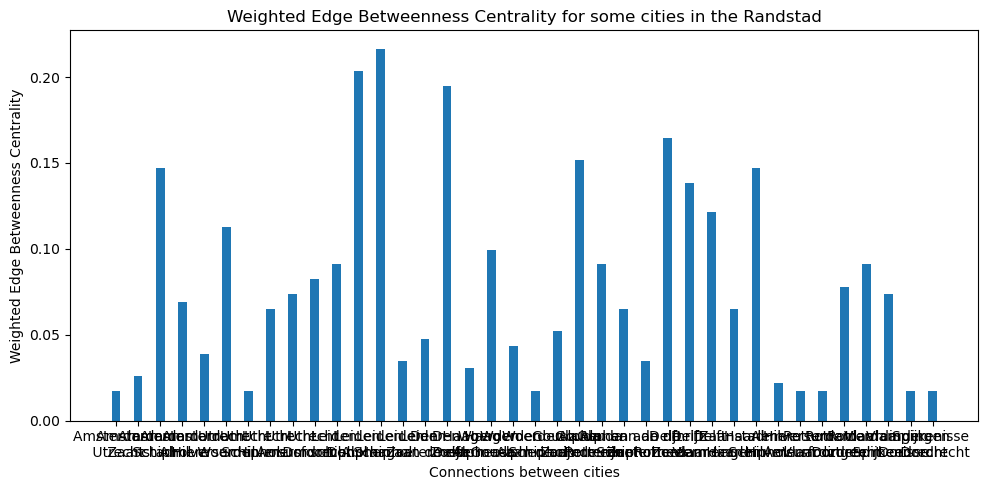

In [23]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality